<a href="https://colab.research.google.com/github/sachincs3108/portfolioprojects/blob/main/P5_OT_LP_PULP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

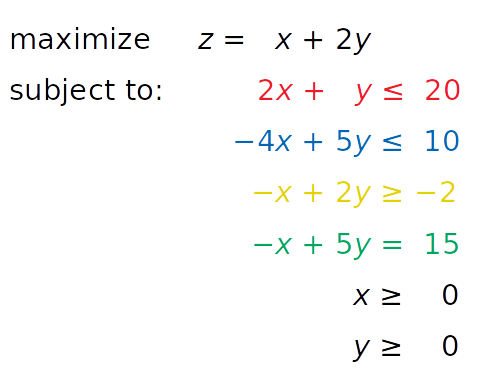

PuLP has a more convenient linear programming API than SciPy. You don’t have to mathematically modify your problem or use vectors and matrices. Everything is cleaner and less prone to errors.

In [ ]:
pip install pulp

     |████████████████████████████████| 14.2 MB 5.5 MB/s 


In [ ]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

In [ ]:
# Create the model
model = LpProblem(name="small-problem", sense=LpMaximize)

You use the sense parameter to choose whether to perform minimization (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1). This choice will affect the result of your problem.

Once that you have the model, you can define the decision variables as instances of the LpVariable class:

In [ ]:
# Initialize the decision variables
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

You need to provide a lower bound with lowBound=0 because the default value is negative infinity. The parameter upBound defines the upper bound, but you can omit it here because it defaults to positive infinity.

The optional parameter cat defines the category of a decision variable. If you’re working with continuous variables, then you can use the default value "Continuous".

You can use the variables x and y to create other PuLP objects that represent linear expressions and constraints:

In [ ]:
expression = 2 * x + 4 * y
type(expression)

pulp.pulp.LpAffineExpression

In [ ]:
constraint = 2 * x + 4 * y >= 8
type(constraint)

pulp.pulp.LpConstraint

Having this in mind, the next step is to create the constraints and objective function as well as to assign them to your model. You don’t need to create lists or matrices. Just write Python expressions and use the += operator to append them to the model:

In [ ]:
# Add the constraints to the model
model += (2 * x + y <= 20, "red_constraint")
model += (4 * x - 5 * y >= -10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

In the above code, you define tuples that hold the constraints and their names. LpProblem allows you to add constraints to a model by specifying them as tuples. The first element is a LpConstraint instance. The second element is a human-readable name for that constraint.

Setting the objective function is very similar:

In [ ]:
# Add the objective function to the model
obj_func = x + 2 * y
model += obj_func

Now you have the objective function added and the model defined.

For larger problems, it’s often more convenient to use lpSum() with a list or other sequence than to repeat the + operator. For example, you could add the objective function to the model with this statement:

In [ ]:
# Add the objective function to the model
model += lpSum([x, 2 * y])

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [ ]:
model

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

blue_constraint: 4 x - 5 y >= -10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

Finally, you’re ready to solve the problem. You can do that by calling .solve() on your model object. If you want to use the default solver (CBC), then you don’t need to pass any arguments:

In [ ]:
# Solve the problem
status = model.solve()

.solve() calls the underlying solver, modifies the model object, and returns the integer status of the solution, which will be 1 if the optimum is found. For the rest of the status codes, see LpStatus[].

You can get the optimization results as the attributes of model. The function value() and the corresponding method .value() return the actual values of the attributes:

In [ ]:
print(f"status: {model.status}, {LpStatus[model.status]}")

status: 1, Optimal


In [ ]:
print(f"objective: {model.objective.value()}")

objective: 16.8181817


In [ ]:
for var in model.variables():
...     print(f"{var.name}: {var.value()}")

x: 7.7272727
y: 4.5454545


In [ ]:
for name, constraint in model.constraints.items():
...     print(f"{name}: {constraint.value()}")

red_constraint: -9.99999993922529e-08
blue_constraint: 18.181818300000003
yellow_constraint: 3.3636362999999996
green_constraint: -2.0000000233721948e-07


**Example-2**


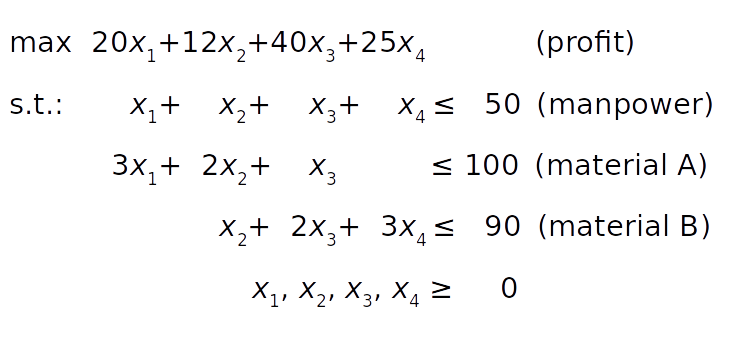

In [ ]:
# Define the model
model = LpProblem(name="resource-allocation", sense=LpMaximize)

# Define the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}

# Add constraints
model += (lpSum(x.values()) <= 50, "manpower")
model += (3 * x[1] + 2 * x[2] + x[3] <= 100, "material_a")
model += (x[2] + 2 * x[3] + 3 * x[4] <= 90, "material_b")

# Set the objective
model += 20 * x[1] + 12 * x[2] + 40 * x[3] + 25 * x[4]

# Solve the optimization problem
status = model.solve()

# Get the results
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 1900.0
x1: 5.0
x2: 0.0
x3: 45.0
x4: 0.0
manpower: 0.0
material_a: -40.0
material_b: 0.0
